<a href="https://colab.research.google.com/github/adnansherwani/Deep-Learning/blob/main/01__PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Resources:
* PyTorch Document
* mrdburke github :  https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* https://www.learnpytorch.io/01_pytorch_workflow/


In [12]:
import torch
from torch import nn # nn contains all of PyTorch's Building blocks for the neural networks [link: https://pytorch.org/docs/stable/nn.html#module-torch.nn]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder, StandardScaler

#PyTorch Version
torch.__version__

'2.4.1+cu121'

In [13]:
PyTorch_Workflow = {1 : 'Data (Prepare & Load)',
                         2 : 'Build Model',
                         3 : 'Training/Fitting the model',
                         4 : 'Prediction/Evaluating a model (Interference)',
                         5 : 'Saving & Loading a model',
                         6 : 'Putting it all together'
                         }

PyTorch_Workflow

{1: 'Data (Prepare & Load)',
 2: 'Build Model',
 3: 'Training/Fitting the model',
 4: 'Prediction/Evaluating a model (Interference)',
 5: 'Saving & Loading a model',
 6: 'Putting it all together'}

## 1. Data (Prepare & Load)

Data can be anything:

* Excel (Formatted data)
* Images
* Audio
* Video
* DNA
* Text / PDF

Machine Learning / Deep Learning consist of two parts:
1. Get Data into numerical representations.
2. Build models to learn patterns in that numerical representations

In [14]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/Colab Notebooks/Keys_Authen/kaggle (2).json ~/.kaggle/kaggle (2).json # Update the path if kaggle.json is not in /content/
# ! chmod 600 ~/.kaggle/kaggle (2).json
# ! kaggle datasets download mlg-ulb/creditcardfraud

# ! unzip creditcardfraud.zip

# df = pd.read_csv('creditcard.csv')
# # df.head()
# df.shape
# df.info()
# df['Class'].value_counts()
# df[df['Class'] == 1]

In [15]:
# !pip install pyodbc
# import pyodbc
# conn = pyodbc.connect('Driver={SQL Server};'
#                       'Server=LAPTOP-O3A99PIR;'
#                       'Database=TestDatabase;'
#                       'Trusted_Connection=yes;')

# cursor = conn.cursor()

In [16]:
df = pd.read_csv(r'/content/laptop_price1.csv', encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


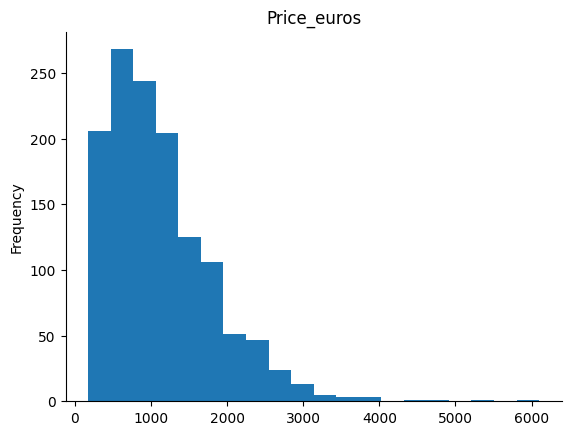

In [17]:
# @title Price_euros

from matplotlib import pyplot as plt
df['Price_euros'].plot(kind='hist', bins=20, title='Price_euros')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [19]:
# prompt: generate value count for all the categorical columns

for column in df.columns:
  if df[column].dtype == object:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for Company:
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64


Value counts for Product:
Product
XPS 13                                 30
Inspiron 3567                          29
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
L403NA-GA013TS (N3350/4GB/32GB/W10)     1
IdeaPad 500-15ISK                       1
GP62M 7RDX                              1
V110-15ISK (i3-6006U/4GB/1TB/No         1
15-BA015wm (E2-7110/4GB/500GB/W10)      1
Name: count, Length: 618, dtype: int64


Value counts for TypeName:
TypeName
Notebook              727
Gaming          

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [21]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [22]:
df['inches'] = df['Inches'].astype(int)
df.drop('Inches', axis=1, inplace=True)

In [23]:
SR = pd.read_excel('/content/laptopPrice_ScreenResolution.xlsx')
SR.head()

,ScreenResolution,Screen Resolution Full,Display Technology,Sceen Resolution,TouchScreen
0,Full HD 1920x1080,1920x1080,TN/VA,1920x1080,N
1,1366x768,1366x768,TN/VA,1366x768,N
2,IPS Panel Full HD 1920x1080,IPS 1920x1080,IPS,1920x1080,N
3,IPS Panel Full HD / Touchscreen 1920x1080,IPS 1920x1080,IPS,1920x1080,Y
4,Full HD / Touchscreen 1920x1080,IPS 1920x1080,IPS,1920x1080,Y


In [24]:
df = pd.merge(df, SR, on='ScreenResolution', how='left').drop(["ScreenResolution", "Screen Resolution Full"], axis=1)
df.head()

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,inches,Display Technology,Sceen Resolution,TouchScreen
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,13,IPS,2560x1600,N
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,13,TN/VA,1440x900,N
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,15,TN/VA,1920x1080,N
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,15,IPS,2880x1800,N
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,13,IPS,2560x1600,N


In [25]:
df.rename(columns={'Sceen Resolution': 'Screen Resolution'}, inplace=True)

In [26]:
df['Screen Resolution'].value_counts().nunique()

10

In [27]:
df['TouchScreen'].nunique()

2

In [28]:
df['Cpu'].nunique()

118

In [29]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M7-6Y75 1.2GHz,1
Intel Core i5 7200U 2.50GHz,1
Intel Core i5 7200U 2.70GHz,1


In [30]:
# prompt: convert the object datatype to numerical and then normalize the data for deep learning
# Create a copy of the DataFrame to avoid modifying the original
df_processed = df.copy()

# Iterate through columns and convert object (categorical) data to numerical using Label Encoding
for column in df_processed.columns:
  if df_processed[column].dtype == object:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column])

# Separate features (X) and target (y) if needed (assuming 'Price_euros' is the target)
X = df_processed.drop('Price_euros', axis=1)
y = df_processed['Price_euros']

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame (optional)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Now X_normalized_df contains your normalized numerical data, and y contains the target variable.
# You can use this data for deep learning models in PyTorch.


In [31]:
X_normalized_df.drop(columns='laptop_ID', axis=1, inplace=True)

In [32]:
X_normalized_df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,inches,Display Technology,Screen Resolution,TouchScreen
0,-1.333189,-0.047766,1.138779,-0.475914,0.865168,-1.542166,0.153493,3.083616,-1.219843,-1.161255,-1.427339,2.241109,-0.406785
1,-1.333189,-0.041946,1.138779,-0.555339,0.865168,-1.792003,-0.170358,3.083616,-1.289595,-1.161255,0.700605,-0.666778,-0.406785
2,0.136477,-1.502761,0.335406,-0.118498,0.865168,-0.043142,-0.077829,-0.781657,-0.382823,0.294363,0.700605,-0.020581,-0.406785
3,-1.333189,-0.047766,1.138779,0.318342,-1.797179,1.580802,-2.113462,3.083616,-0.452574,0.294363,-1.427339,2.887307,-0.406785
4,-1.333189,-0.047766,1.138779,-0.396488,0.865168,-0.043142,0.199757,3.083616,-1.219843,-1.161255,-1.427339,2.241109,-0.406785
